In [41]:
# Author: Alden Sahi
# Project Name: EarningsReportJunkie
# Project Description:
  # User specifies stock
  # Returns Predicted Capital Gain using disparity of stock price that predicted earnings
  # suggests vs reported earnings

# Model needs: predicted stock price at the data of earnings, predicted earnings, and the last pe ratio from last earnings
# THis means wee nee

In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta

In [43]:
# User Input
ticker='IBM'
alpha_key = 'TQCF34ZIGZ7OTPLO'
train_data_start = '1996-03-31'
train_data_end = '2024-12-31'

In [44]:
# Hypothesis: Buying a long period of time stock over a period of time missies
# the power of compound interest

# Datafrane Columns: A bunch of stuff from the earnings report and a vwma

# My idea is to create buy signals with great earnings and 
# sell signals once the vwma egts crossed

# This strategy will output returns year after year

In [45]:
# Proof of Concept
# Show average earnings after 1 5 and 10 years of a company
#S Show earnigns after 1 4 and 10 years while buyings and sellings

## Getting Data

In [46]:
# call api for earnings report data

url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={ticker}&apikey={alpha_key}'
r = requests.get(url)
data = r.json()

# Check if the API call was successful
if 'quarterlyEarnings' not in data:
    raise ValueError(f"Failed to fetch earnings data for {ticker}. Check your API key or ticker symbol.")

# congolmerate data to df
earnings_data = pd.DataFrame(data['quarterlyEarnings'])

In [47]:
# api for cash flow

url = f'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={ticker}&apikey={alpha_key}]'
r = requests.get(url)
data = r.json()

print(data)

{'symbol': 'IBM', 'annualReports': [{'fiscalDateEnding': '2024-12-31', 'reportedCurrency': 'USD', 'operatingCashflow': '13445000000', 'paymentsForOperatingActivities': '2982000000', 'proceedsFromOperatingActivities': 'None', 'changeInOperatingLiabilities': '-13000000', 'changeInOperatingAssets': '540000000', 'depreciationDepletionAndAmortization': '4667000000', 'capitalExpenditures': '1048000000', 'changeInReceivables': '374000000', 'changeInInventory': '166000000', 'profitLoss': '6009000000', 'cashflowFromInvestment': '-4937000000', 'cashflowFromFinancing': '-7079000000', 'proceedsFromRepaymentsOfShortTermDebt': '30000000', 'paymentsForRepurchaseOfCommonStock': 'None', 'paymentsForRepurchaseOfEquity': 'None', 'paymentsForRepurchaseOfPreferredStock': 'None', 'dividendPayout': '6147000000', 'dividendPayoutCommonStock': '6147000000', 'dividendPayoutPreferredStock': 'None', 'proceedsFromIssuanceOfCommonStock': 'None', 'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet': '570500000

In [48]:
# make into dataframe
cash_flow_data = pd.DataFrame(data['quarterlyReports'])
cash_flow_data

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2024-12-31,USD,4330000000,None,None,None,None,1113000000,303000000,None,...,1546000000,None,None,0,None,-112000000,None,None,None,2914000000
1,2024-09-30,USD,-745000000,None,None,None,None,1271000000,206000000,None,...,1561000000,None,None,219000000,None,-189000000,None,None,None,-330000000
2,2024-03-31,USD,4168000000,None,None,None,None,1131000000,239000000,None,...,1522000000,None,None,5486000000,None,-199000000,None,None,None,1605000000
3,2023-12-31,USD,4463000000,None,None,None,None,1152000000,300000000,None,...,1518000000,None,None,0,None,-64000000,None,None,None,3288000000
4,2023-09-30,USD,3056000000,None,None,None,None,1093000000,281000000,None,...,1515000000,None,None,154000000,None,0,None,None,None,1704000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2009-06-30,USD,4741000000,None,None,None,None,1242000000,863000000,None,...,732000000,None,None,1056000000,None,-1671000000,None,-616000000,235000000,3103000000
62,2009-03-31,USD,4386000000,None,None,None,None,1229000000,760000000,None,...,675000000,None,None,913000000,None,-1765000000,None,-447000000,-202000000,2295000000
63,2008-12-31,USD,6621000000,None,None,None,None,1321000000,1381000000,None,...,669000000,None,None,5578000000,None,-740000000,None,2986000000,116000000,4427000000
64,2008-09-30,USD,3738000000,None,None,None,None,1379000000,1126000000,None,...,677000000,None,None,1438000000,None,-2674000000,None,129000000,-233000000,2823000000


In [49]:
# api for balance sheet

url = f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker}&apikey={alpha_key}'
r = requests.get(url)
data = r.json()

print(data)

{'symbol': 'IBM', 'annualReports': [{'fiscalDateEnding': '2024-12-31', 'reportedCurrency': 'USD', 'totalAssets': '137175000000', 'totalCurrentAssets': '34482000000', 'cashAndCashEquivalentsAtCarryingValue': '13947000000', 'cashAndShortTermInvestments': '13947000000', 'inventory': '1289000000', 'currentNetReceivables': '7642000000', 'totalNonCurrentAssets': '101992000000', 'propertyPlantEquipment': '-979000000', 'accumulatedDepreciationAmortizationPPE': 'None', 'intangibleAssets': '71366000000', 'intangibleAssetsExcludingGoodwill': '10660000000', 'goodwill': '60706000000', 'investments': '108000000', 'longTermInvestments': '108000000', 'shortTermInvestments': '644000000', 'otherCurrentAssets': '11798000000', 'otherNonCurrentAssets': 'None', 'totalLiabilities': '109783000000', 'totalCurrentLiabilities': '33142000000', 'currentAccountsPayable': '4032000000', 'deferredRevenue': '17529000000', 'currentDebt': '10148000000', 'shortTermDebt': '5089000000', 'totalNonCurrentLiabilities': '849880

In [50]:
# make into dataframe
balance_sheet_data = pd.DataFrame(data['quarterlyReports'])
balance_sheet_data 

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2024-12-31,USD,137175000000,34482000000,13947000000,13947000000,1289000000,7642000000,101992000000,-979000000,...,4861000000,49884000000,116320000000,6545000000,11048000000,27307000000,169968000000,151163000000,61380000000,926290070
1,2024-09-30,USD,134339000000,30543000000,13197000000,13197000000,1367000000,6203000000,96174000000,5614000000,...,3590000000,52980000000,82312000000,5934000000,11186000000,24448000000,169935000000,149789000000,61013000000,923600000
2,2024-03-31,USD,137169000000,36663000000,14603000000,14603000000,1212000000,6676000000,93235000000,5594000000,...,5469000000,54033000000,86750000000,6009000000,10914000000,23261000000,169759000000,151362000000,60145000000,917200000
3,2023-12-31,USD,135241000000,32908000000,13068000000,13068000000,1161000000,7725000000,101302000000,-472000000,...,6304000000,50121000000,120630000000,6203000000,11475000000,22533000000,169624000000,151276000000,59643000000,915013646
4,2023-09-30,USD,129321000000,27705000000,7257000000,7257000000,1399000000,6039000000,100035000000,5369000000,...,6400000000,48828000000,84575000000,8126000000,12081000000,23081000000,169640000000,149506000000,59313000000,912800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2010-06-30,USD,103420000000,44895000000,10325000000,12241000000,2595000000,9051000000,49339000000,13534000000,...,None,None,26650000000,4539000000,8295000000,21059000000,89276000000,85323000000,43522000000,1278600000
58,2010-03-31,USD,105208000000,45697000000,12472000000,13977000000,2524000000,9324000000,49968000000,13841000000,...,None,None,26319000000,5285000000,8506000000,22033000000,85238000000,82783000000,42665000000,1301200000
59,2009-12-31,USD,109022000000,48935000000,12183000000,13974000000,2494000000,10736000000,49443000000,14165000000,...,2222000000,None,26100000000,5223000000,8819000000,22637000000,81243000000,80900000000,41810000000,1318329640
60,2009-09-30,USD,103675000000,43446000000,9532000000,11512000000,2546000000,9426000000,50000000000,14189000000,...,None,None,25468000000,5704000000,9863000000,18396000000,78411000000,76812000000,40482000000,1319900000


In [51]:
# Income Statement APi

url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={ticker}&apikey={alpha_key}'
r = requests.get(url)
data = r.json()

print(data)

{'symbol': 'IBM', 'annualReports': [{'fiscalDateEnding': '2024-12-31', 'reportedCurrency': 'USD', 'grossProfit': '35551000000', 'totalRevenue': '62753000000', 'costOfRevenue': '27201000000', 'costofGoodsAndServicesSold': '176000000', 'operatingIncome': '5899000000', 'sellingGeneralAndAdministrative': '19688000000', 'researchAndDevelopment': '7479000000', 'operatingExpenses': '29652000000', 'investmentIncomeNet': 'None', 'netInterestIncome': '-965000000', 'interestIncome': '747000000', 'interestExpense': '1712000000', 'nonInterestIncome': '-37000000', 'otherNonOperatingIncome': '877000000', 'depreciation': '2168000000', 'depreciationAndAmortization': '2499000000', 'incomeBeforeTax': '5805000000', 'incomeTaxExpense': '-218000000', 'interestAndDebtExpense': 'None', 'netIncomeFromContinuingOperations': '6015000000', 'comprehensiveIncomeNetOfTax': '9516000000', 'ebit': '7517000000', 'ebitda': '10016000000', 'netIncome': '6023000000'}, {'fiscalDateEnding': '2023-12-31', 'reportedCurrency': '

In [52]:
# make into dataframe
income_stmt_data = pd.DataFrame(data['quarterlyReports'])
income_stmt_data 

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2024-12-31,USD,10439000000,17554000000,7114000000,70000000,3307000000,4865000000,1967000000,7132000000,...,524000000,589000000,3293000000,379000000,None,2927000000,4064000000,3717000000,4306000000,2914000000
1,2024-09-30,USD,8420000000,14968000000,6548000000,12000000,1364000000,4911000000,1876000000,7056000000,...,570000000,701000000,-815000000,-485000000,None,-317000000,1570000000,-386000000,315000000,-330000000
2,2024-03-31,USD,7742000000,14462000000,6719000000,28000000,85000000,4974000000,1796000000,7657000000,...,533000000,598000000,1103000000,-502000000,432000000,1575000000,1878000000,1535000000,2133000000,1605000000
3,2023-12-31,USD,10267000000,17381000000,7114000000,112000000,3876000000,4791000000,1748000000,6391000000,...,541000000,611000000,3762000000,474000000,405000000,3285000000,624000000,4167000000,4778000000,3288000000
4,2023-09-30,USD,8023000000,14752000000,6729000000,42000000,1994000000,4458000000,1685000000,6029000000,...,521000000,572000000,1863000000,159000000,412000000,1714000000,2105000000,2275000000,2847000000,1704000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2010-06-30,USD,10809000000,23724000000,12915000000,12641000000,3858000000,5061000000,1475000000,7041000000,...,899000000,284000000,4575000000,1190000000,90000000,3385000000,6438000000,4665000000,4949000000,3385000000
58,2010-03-31,USD,9976000000,22857000000,12880000000,12608000000,2504000000,5677000000,1509000000,7554000000,...,924000000,286000000,3515000000,914000000,82000000,2601000000,2601000000,3597000000,3883000000,2601000000
59,2009-12-31,USD,13145000000,27230000000,14085000000,13784000000,5827000000,5560000000,1460000000,7399000000,...,967000000,298000000,6381000000,1568000000,81000000,4813000000,21253000000,6462000000,6760000000,4813000000
60,2009-09-30,USD,10627000000,23566000000,12938000000,12637000000,4168000000,5013000000,1446000000,6543000000,...,953000000,305000000,4373000000,1159000000,84000000,3214000000,3214000000,4457000000,4762000000,3214000000


In [53]:
# prices api
prices = yf.download(ticker, start=train_data_start, end=train_data_end)

[*********************100%***********************]  1 of 1 completed


## Merging and Filtering Data

In [54]:
total_report = earnings_data.merge(cash_flow_data, on='fiscalDateEnding') \
                           .merge(income_stmt_data, on='fiscalDateEnding') \
                           .merge(balance_sheet_data, on='fiscalDateEnding')

In [55]:
#joins into single index (was multtIndex)
prices.columns = ['_'.join(col) for col in prices.columns]


In [56]:
# Create a new column from the index so we can merge easy with total_report
prices['fiscalDateEnding'] = prices.index

# Convert 'fiscalDateEnding' to datetime64[ns]
total_report['fiscalDateEnding'] = pd.to_datetime(total_report['fiscalDateEnding'])

In [57]:
## MORE ACCURATE TBT

# makes new row with dates for


# Create a new column in prices for output
#prices['Aligned_Price'] = None

# for every row in total_report
#for idx, row in total_report.iterrows():
    # if the corresponding rows' report time is premarket
    #if total_report['reportTime_x'][idx] == 'pre-market':
        # save open price to the prices with that idx
       # prices.loc[date] = 1
    # if the corresponding rows' report time is postmarket
    #if total_report['reportTime_x'][idx] == 'poste-market':
        # save the open price of the next day
          #prices.loc[date] = 0
        

    

In [58]:
# sort both datasets to ensure they are in chronological order
earnings_data = earnings_data.sort_index()
prices = prices.sort_index()

In [59]:
prices = prices[[f'Open_{ticker}','fiscalDateEnding']]

In [60]:
# prices 
prices[f'Next_Day_{ticker}'] = prices[f'Open_{ticker}'].shift(-1)

In [61]:
total_report = total_report.merge(prices,on=['fiscalDateEnding'])

In [62]:
# converts columns to floats for computation, invalid parsing is set to Nan
total_report['reportedEPS'] = pd.to_numeric(total_report['reportedEPS'], errors='coerce')
total_report['estimatedEPS'] = pd.to_numeric(total_report['estimatedEPS'], errors='coerce')
total_report[f'Open_{ticker}'] = pd.to_numeric(total_report[f'Open_{ticker}'], errors='coerce') 


# calculate predicted and reported pe ratios
total_report['estimatedPE'] = total_report[f'Open_{ticker}'] / total_report['estimatedEPS']
total_report['reportedPE'] = total_report[f'Open_{ticker}'] / total_report['reportedEPS']

# calculate predicted vs reported price
total_report['estimatedPrice'] = total_report['estimatedEPS'] * total_report['estimatedPE']
total_report['reportedPrice'] = total_report['reportedEPS'] * total_report['estimatedPE']

# calcuclate difference between estimated and reported
total_report['priceDiscrepancy'] = total_report['reportedPrice'] - total_report['estimatedPrice']  

In [63]:
# drops columns that are uneeded
# todo if it has none at all

total_report = total_report.drop(columns=[
    'surprise', 'surprisePercentage', 'reportedEPS', 'estimatedEPS', 'reportTime',
    'estimatedPE', 'reportedPE', 'estimatedPrice', 'reportedPrice', f'Open_{ticker}',
    'reportedCurrency_x', 'paymentsForOperatingActivities', 'proceedsFromOperatingActivities',
    'changeInOperatingLiabilities', 'changeInOperatingAssets', 'changeInReceivables',
    'changeInInventory', 'paymentsForRepurchaseOfPreferredStock', 'dividendPayoutPreferredStock',
    'proceedsFromIssuanceOfCommonStock', 'proceedsFromIssuanceOfPreferredStock',
    'proceedsFromSaleOfTreasuryStock', 'changeInExchangeRate', 'reportedCurrency_y',
    'investmentIncomeNet', 'reportedCurrency', 'otherNonCurrentAssets','commonStock', 
])


In [64]:
total_report = total_report.drop(columns=[,'reportedDate'
])

SyntaxError: invalid syntax (1603929340.py, line 1)

In [ ]:
# transform none to numer
total_report = total_report.replace(['None','NaN'],0)

# prepares total report to report
total_report = total_report.apply(pd.to_numeric)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize each column independently
scaled_total_report= scaler.fit_transform(total_report)

# Convert back to a DataFrame (optional)
scaled_total_report = pd.DataFrame(scaled_total_report, columns=total_report.columns)
scaled_total_report

,operatingCashflow,depreciationDepletionAndAmortization,capitalExpenditures,profitLoss,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepaymentsOfShortTermDebt,paymentsForRepurchaseOfCommonStock,paymentsForRepurchaseOfEquity,dividendPayout,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStockSharesOutstanding,Next_Day_IBM,priceDiscrepancy
0,0.000000,0.649239,0.015550,0.306930,0.911292,0.180915,0.681547,0.000000,0.000000,1.000000,...,0.916657,0.532651,0.209787,0.444352,1.000000,1.000000,0.851454,0.085435,1.000000,0.735488
1,0.448674,0.520847,0.053349,0.509275,0.982123,0.392294,0.681547,0.000000,0.000000,0.939502,...,0.877052,0.577404,0.468718,0.553040,0.821383,0.996163,0.846140,0.054206,0.419180,0.854382
2,0.599337,0.518862,0.038038,0.439552,0.724566,1.000000,0.681243,0.000000,0.000000,0.924081,...,0.931294,0.569617,0.452922,0.552566,0.773927,0.995762,0.845407,0.048853,0.394372,0.818070
3,0.350928,0.577763,0.042105,0.000000,0.927036,0.640259,0.704828,0.000000,0.000000,0.916963,...,0.777584,0.479915,0.499484,0.708309,0.652464,0.995437,0.838163,0.041074,0.314958,0.601293
4,0.274005,0.632694,0.047368,0.489126,0.987457,0.286712,0.681445,0.000000,0.000000,0.913405,...,0.766960,0.465550,0.500516,0.716961,0.599444,0.995523,0.891048,0.035219,0.423224,0.592360
5,0.529576,0.639312,0.033493,0.418870,0.937995,0.688081,0.680737,0.000000,0.000000,0.897983,...,0.805319,0.524424,0.467789,0.759393,0.570906,0.994439,0.892210,0.030257,0.350991,0.576179
6,0.436207,0.722038,0.073923,0.589446,0.960075,0.395031,0.592469,0.000000,0.000000,0.896797,...,0.777151,0.796747,0.566075,0.777409,0.559062,0.994114,0.901327,0.027422,0.366568,0.579216
7,0.458621,0.922568,0.099761,0.461194,0.961562,0.463018,0.773459,0.000000,0.000000,0.893238,...,0.811911,0.541975,0.677060,0.917625,0.823529,0.994266,0.986381,0.025215,0.360848,0.553047
8,0.446950,0.919921,0.100239,0.481983,0.895548,0.363414,0.683672,0.000000,0.000000,0.888493,...,0.843210,0.546922,0.769358,0.865711,0.800795,0.994244,0.990206,0.020548,0.382969,0.588195
9,0.750531,0.914626,0.084450,0.442537,0.917240,0.172416,0.672538,0.000000,0.000000,0.876631,...,0.885963,0.544233,0.801982,0.835842,0.756836,0.993767,0.991695,0.017339,0.308097,0.811116


## Feature Engineering Target Variable (ft. Fa)

In [ ]:
compute_target = pd.DataFrame()

# takes difference between previous and current row
compute_target = scaled_total_report.diff()

# drops NaN first Row
compute_target = compute_target.iloc[1:].reset_index(drop=True)

compute_target

,operatingCashflow,depreciationDepletionAndAmortization,capitalExpenditures,profitLoss,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepaymentsOfShortTermDebt,paymentsForRepurchaseOfCommonStock,paymentsForRepurchaseOfEquity,dividendPayout,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStockSharesOutstanding,Next_Day_IBM,priceDiscrepancy
0,0.448674,-0.128392,0.037799,0.202345,0.070831,0.211379,0.000000,0.000000,0.000000,-0.060498,...,-0.039604,0.044753,0.258930,0.108688,-0.178617,-0.003837,-0.005314,-0.031229,-0.580820,0.118894
1,0.150663,-0.001985,-0.015311,-0.069723,-0.257557,0.607706,-0.000304,0.000000,0.000000,-0.015421,...,0.054242,-0.007787,-0.015796,-0.000474,-0.047456,-0.000401,-0.000733,-0.005353,-0.024808,-0.036312
2,-0.248408,0.058901,0.004067,-0.439552,0.202470,-0.359741,0.023585,0.000000,0.000000,-0.007117,...,-0.153710,-0.089703,0.046562,0.155743,-0.121463,-0.000325,-0.007244,-0.007778,-0.079414,-0.216777
3,-0.076923,0.054931,0.005263,0.489126,0.060421,-0.353547,-0.023383,0.000000,0.000000,-0.003559,...,-0.010623,-0.014365,0.001032,0.008652,-0.053021,0.000087,0.052885,-0.005855,0.108266,-0.008932
4,0.255570,0.006618,-0.013876,-0.070256,-0.049462,0.401368,-0.000709,0.000000,0.000000,-0.015421,...,0.038358,0.058874,-0.032728,0.042432,-0.028537,-0.001084,0.001162,-0.004962,-0.072233,-0.016181
5,-0.093369,0.082727,0.040431,0.170576,0.022080,-0.293050,-0.088268,0.000000,0.000000,-0.001186,...,-0.028168,0.272323,0.098286,0.018016,-0.011844,-0.000325,0.009117,-0.002834,0.015577,0.003037
6,0.022414,0.200529,0.025837,-0.128252,0.001487,0.067987,0.180990,0.000000,0.000000,-0.003559,...,0.034760,-0.254772,0.110985,0.140216,0.264467,0.000152,0.085054,-0.002208,-0.005720,-0.026168
7,-0.011671,-0.002647,0.000478,0.020789,-0.066014,-0.099604,-0.089786,0.000000,0.000000,-0.004745,...,0.031299,0.004948,0.092298,-0.051914,-0.022734,-0.000022,0.003825,-0.004667,0.022121,0.035148
8,0.303581,-0.005295,-0.015789,-0.039446,0.021692,-0.190997,-0.011135,0.000000,0.000000,-0.011862,...,0.042753,-0.002689,0.032624,-0.029868,-0.043959,-0.000477,0.001489,-0.003209,-0.074872,0.222921
9,0.125464,0.017869,0.044019,0.042751,0.046617,-0.036730,-0.030064,0.000000,0.000000,-0.003559,...,0.052096,0.436942,0.198018,-0.036624,-0.062957,-0.000228,0.005630,-0.002221,-0.048275,0.188884


In [ ]:
compute_target['SumOfNorm'] = compute_target.sum(axis=1)

In [ ]:
compute_target['FinRepScore'] = compute_target['SumOfNorm'] 

In [ ]:
compute_target

,operatingCashflow,depreciationDepletionAndAmortization,capitalExpenditures,profitLoss,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepaymentsOfShortTermDebt,paymentsForRepurchaseOfCommonStock,paymentsForRepurchaseOfEquity,dividendPayout,...,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStockSharesOutstanding,Next_Day_IBM,priceDiscrepancy,SumOfNorm,FinRepScore
0,0.448674,-0.128392,0.037799,0.202345,0.070831,0.211379,0.000000,0.000000,0.000000,-0.060498,...,0.258930,0.108688,-0.178617,-0.003837,-0.005314,-0.031229,-0.580820,0.118894,3.983592,3.983592
1,0.150663,-0.001985,-0.015311,-0.069723,-0.257557,0.607706,-0.000304,0.000000,0.000000,-0.015421,...,-0.015796,-0.000474,-0.047456,-0.000401,-0.000733,-0.005353,-0.024808,-0.036312,0.177803,0.177803
2,-0.248408,0.058901,0.004067,-0.439552,0.202470,-0.359741,0.023585,0.000000,0.000000,-0.007117,...,0.046562,0.155743,-0.121463,-0.000325,-0.007244,-0.007778,-0.079414,-0.216777,-7.991096,-7.991096
3,-0.076923,0.054931,0.005263,0.489126,0.060421,-0.353547,-0.023383,0.000000,0.000000,-0.003559,...,0.001032,0.008652,-0.053021,0.000087,0.052885,-0.005855,0.108266,-0.008932,3.558457,3.558457
4,0.255570,0.006618,-0.013876,-0.070256,-0.049462,0.401368,-0.000709,0.000000,0.000000,-0.015421,...,-0.032728,0.042432,-0.028537,-0.001084,0.001162,-0.004962,-0.072233,-0.016181,2.841363,2.841363
5,-0.093369,0.082727,0.040431,0.170576,0.022080,-0.293050,-0.088268,0.000000,0.000000,-0.001186,...,0.098286,0.018016,-0.011844,-0.000325,0.009117,-0.002834,0.015577,0.003037,0.303504,0.303504
6,0.022414,0.200529,0.025837,-0.128252,0.001487,0.067987,0.180990,0.000000,0.000000,-0.003559,...,0.110985,0.140216,0.264467,0.000152,0.085054,-0.002208,-0.005720,-0.026168,2.636858,2.636858
7,-0.011671,-0.002647,0.000478,0.020789,-0.066014,-0.099604,-0.089786,0.000000,0.000000,-0.004745,...,0.092298,-0.051914,-0.022734,-0.000022,0.003825,-0.004667,0.022121,0.035148,0.771621,0.771621
8,0.303581,-0.005295,-0.015789,-0.039446,0.021692,-0.190997,-0.011135,0.000000,0.000000,-0.011862,...,0.032624,-0.029868,-0.043959,-0.000477,0.001489,-0.003209,-0.074872,0.222921,0.666207,0.666207
9,0.125464,0.017869,0.044019,0.042751,0.046617,-0.036730,-0.030064,0.000000,0.000000,-0.003559,...,0.198018,-0.036624,-0.062957,-0.000228,0.005630,-0.002221,-0.048275,0.188884,-1.276627,-1.276627


ValueError: x and y must be the same size

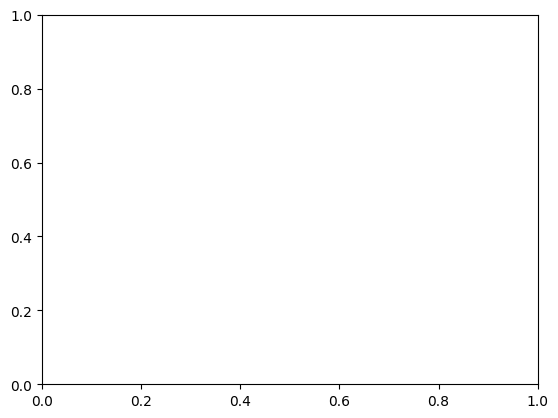

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(compute_target['FinRepScore'],scaled_total_report['fiscalDateEnding'])

## Regression Model Selection Diary

In [ ]:
scaled_total_report = scaled_total_report.iloc[1:].reset_index(drop=True)


In [ ]:
X = scaled_total_report
y = compute_target["FinRepScore"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[5,10,20],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5]
}


# Initialize and train the model
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Best Params
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 20}
Best MSE: 16.566359785552045


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Insert best params
best = RandomForestRegressor(max_depth=5, min_samples_split=5,n_estimators=20)
best.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=20)

In [ ]:
# Make predictions
y_pred = best.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE/Average Score:", mse/compute_target['FinRepScore'].mean())
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

MSE/Average Score: -225.4400671956465
Mean Absolute Error (MAE): 3.715002259386178
R² Score: 0.01972313401825343


# Export

In [ ]:
#exports model
import joblib
joblib.dump(model,'rf.joblib')

['rf.joblib']

In [ ]:
#loaded_model = joblib.load('rf.joblib')
#loaded.predict(X_Test)